In [57]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution, plot_histogram
from qiskit_aer import AerSimulator

In [58]:
shots = 10

def deutsch_algorithm(oracle):
    """
    Implements Deutsch's algorithm using the given oracle.
    
    Parameters:
    oracle (QuantumCircuit): A quantum circuit implementing the oracle function f(x).
    
    Returns:
    str: 'constant' if f(x) is constant, 'balanced' if f(x) is balanced.
    """
    # Create a 2-qubit quantum circuit
    qc = QuantumCircuit(2, 1)
    
    # Initialize the qubits
    qc.x(1)  # Apply X gate to the second qubit
    qc.h([0, 1])  # Apply Hadamard gate to both qubits
    
    # Apply the oracle
    qc.append(oracle.to_gate(), [0, 1])
    
    # Apply Hadamard to the first qubit again
    qc.h(0)
    
    # Measure the first qubit
    qc.measure(0, 0)

    display(qc.draw('mpl'))
    # display(qc.decompose(reps=1).draw('mpl'))

    # Simulate the circuit
    simulator = AerSimulator()
    result = simulator.run(qc.decompose(reps=1), shots= shots).result()
    counts = result.get_counts()

    display(plot_distribution(counts))
    display(plot_histogram(counts))
    
    # Determine if f(x) is constant or balanced
    return 'constant' if '0' in counts and counts['0'] > counts.get('1', 0) else 'balanced'


In [59]:
# Define oracle functions

def constant_oracle():
    """ Creates a quantum oracle for a constant function f(x) = 0. """
    oracle = QuantumCircuit(2, name="  f(x) = 0  ")
    return oracle

def balanced_oracle():
    """ Creates a quantum oracle for a balanced function f(x) = x. """
    oracle = QuantumCircuit(2, name="  f(x) = 1  ")
    oracle.cx(0, 1)
    return oracle

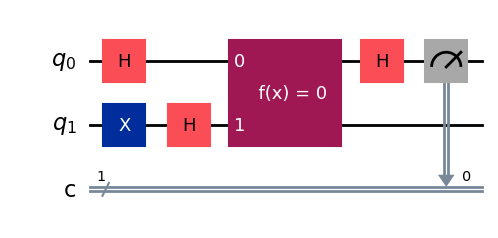

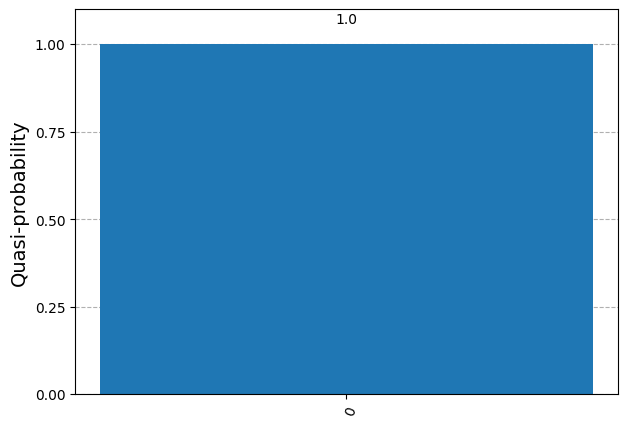

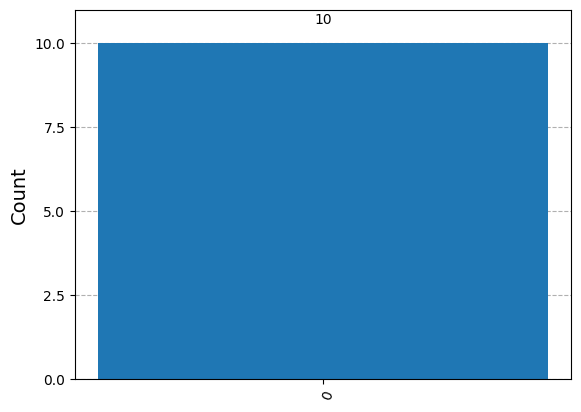

Testing constant oracle: constant


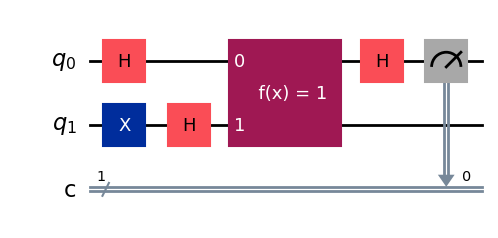

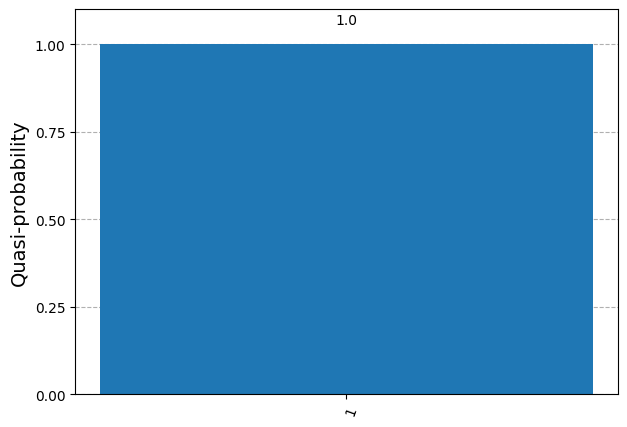

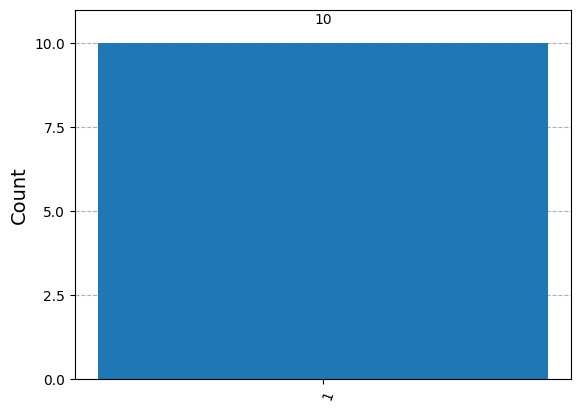

Testing balanced oracle: balanced


In [60]:
# Test the algorithm
print("Testing constant oracle:", deutsch_algorithm(constant_oracle()))
print("Testing balanced oracle:", deutsch_algorithm(balanced_oracle()))